In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import cleaned loan data
data = pd.read_excel('/Users/kthan/Desktop//Capstone-Project/loan_data_cleaned.xlsx') 

In [50]:
# Check to ensure data was properly imported
data.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban,Y


In [3]:
# Import cleaned loan data where the categorical variables are encoded
data_numeric = pd.read_excel('/Users/kthan/Desktop//Capstone-Project/loan_data_cleaned_numeric.xlsx') 

In [51]:
# Check to ensure data was properly imported
data_numeric.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,4583,1508.0,128,360,1,0,0
1,1,1,0,0,1,3000,0.0,66,360,1,2,1


# Exploratory Data Analysis on Key Features
Revisiting the data to conduct a more in-depth analysis of the variables that the Logistic and Random Forest models have recognized as key factors influencing loan approval status.

**Target Variable**: 'Loan_Status' <br>
**Independent Variables**: Credit_History, ApplicantIncome, LoanAmount, CoapplicantIncome and Married

Text(0.5, 1.0, 'Applicant Income Distribution by Marital Status')

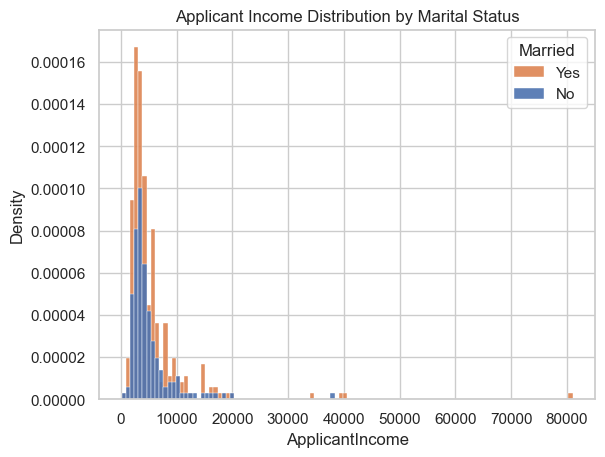

In [138]:
# Review the distribution of Applicant Income by Marital Status
histplot = sns.histplot(data=data_numeric, x='ApplicantIncome', stat='density', hue='Married', alpha=0.9)
histplot.legend(labels=['Yes', 'No'])
histplot.get_legend().set_title('Married')
histplot.set_title('Applicant Income Distribution by Marital Status')

Text(0.5, 1.0, 'Loan Amount Distribution by Marital Status')

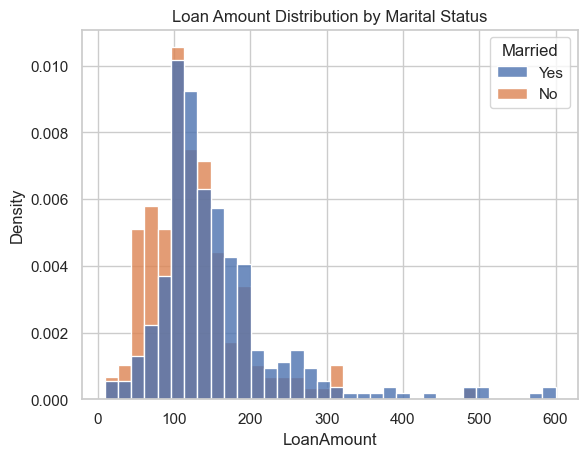

In [124]:
# Review the distribution of Loan Amount by Marital Status
histplot = sns.histplot(data=data, x='LoanAmount', hue='Married', stat='density', common_norm=False, alpha=.8)
histplot.set_title('Loan Amount Distribution by Marital Status')

Text(0.5, 1.0, 'Coapplicant Income Distribution by Marital Status')

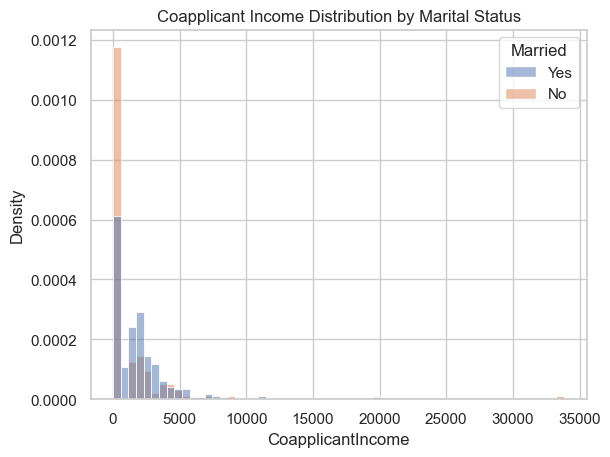

In [125]:
# Review the distribution of CoapplicantIncome by Marital Status
histplot = sns.histplot(data=data, x='CoapplicantIncome', hue='Married', stat='density', common_norm=False)
histplot.set_title('Coapplicant Income Distribution by Marital Status')

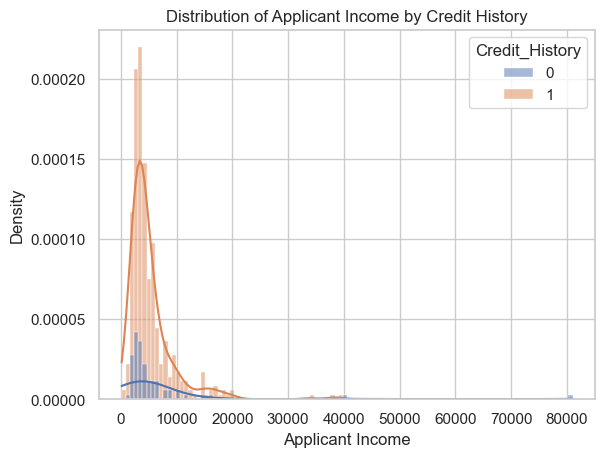

In [131]:
# Review the distribution of ApplicantIncome by Credit History
sns.histplot(data=data, x="ApplicantIncome", hue="Credit_History", stat='density', kde=True)
plt.xlabel("Applicant Income")
plt.title("Distribution of Applicant Income by Credit History")
plt.show()

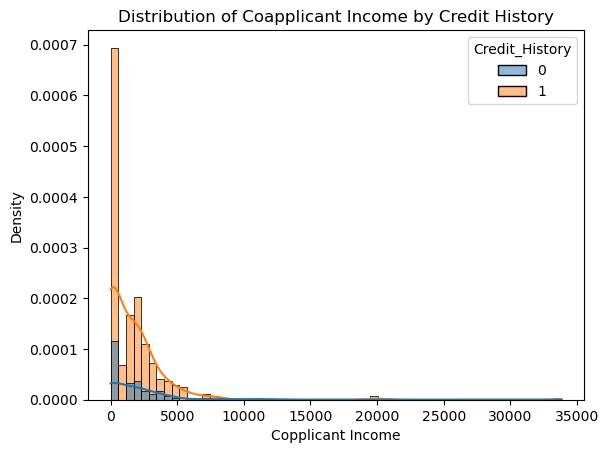

In [10]:
# Review the distribution of Coapplicant by Credit History
sns.histplot(data=data, x="CoapplicantIncome", hue="Credit_History", stat='density', kde=True)
plt.xlabel("Copplicant Income")
plt.title("Distribution of Coapplicant Income by Credit History")
plt.show()

Text(0.5, 1.0, 'Loan Amount Distribution by Credit History')

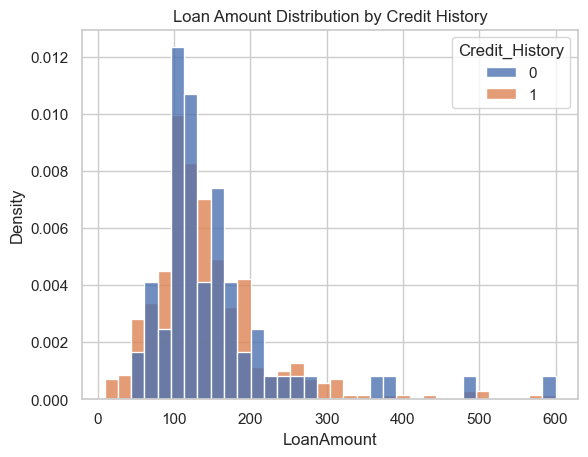

In [142]:
# Review the distribution of Loan Amount by Credit History
histplot = sns.histplot(data=data_numeric, x='LoanAmount', hue='Credit_History', stat='density', common_norm=False, alpha=.8)
histplot.set_title('Loan Amount Distribution by Credit History')

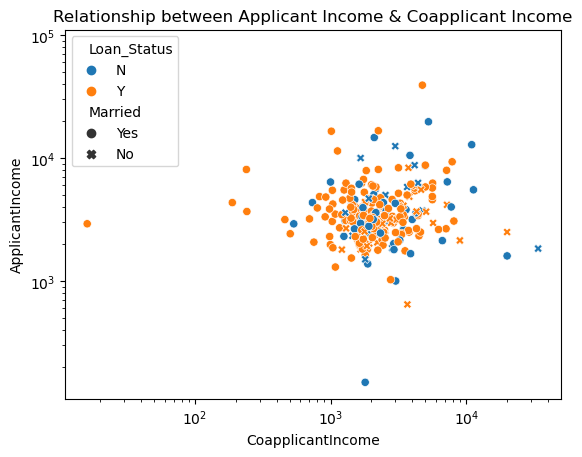

In [12]:
# Review the relationship between Applicant Income & Coapplicant Income
scatterplot = sns.scatterplot(data=data, x='CoapplicantIncome', y='ApplicantIncome', style='Married', hue='Loan_Status')
scatterplot.set_title('Relationship between Applicant Income & Coapplicant Income')
plt.xscale('log')
plt.yscale('log')

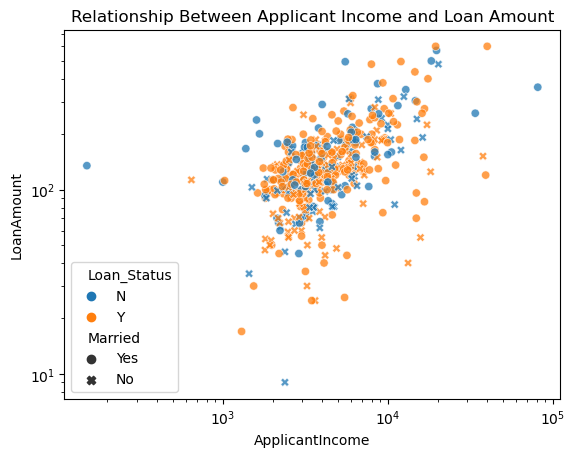

In [8]:
# Review the relationship between ApplicantIncome & LoanAmount
scatterplot = sns.scatterplot(data=data, x='ApplicantIncome', y='LoanAmount', style='Married', hue='Loan_Status', alpha=0.75)
scatterplot.set_title('Relationship Between Applicant Income and Loan Amount')
plt.xscale('log')
plt.yscale('log')

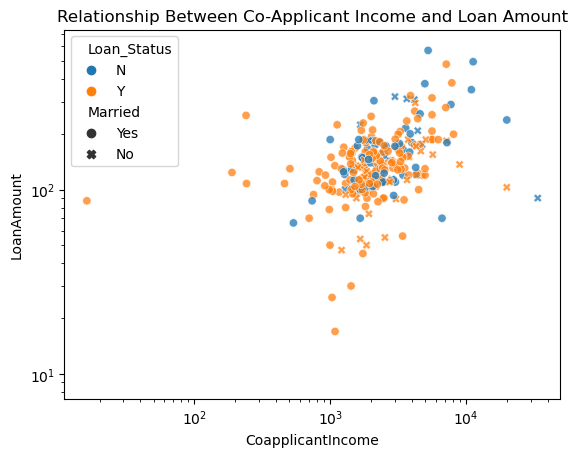

In [7]:
# Review the relationship between CoapplicantIncome & LoanAmount
scatterplot = sns.scatterplot(data=data, x='CoapplicantIncome', y='LoanAmount', style='Married', hue='Loan_Status', alpha=0.75)
scatterplot.set_title('Relationship Between Co-Applicant Income and Loan Amount')
plt.xscale('log')
plt.yscale('log')

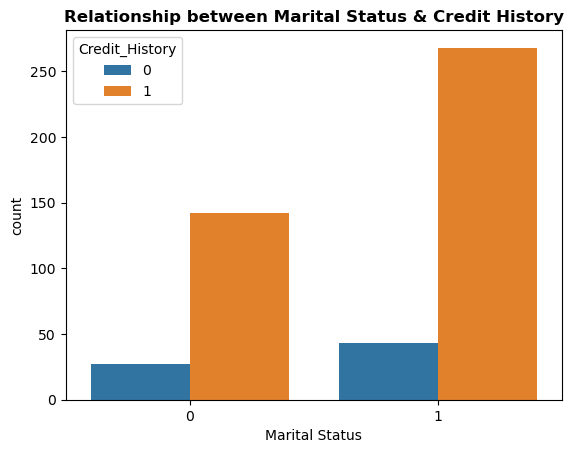

In [5]:
# Review the relationship between Marital Status and Credit History
sns.countplot(x="Married", hue="Credit_History", data=data)
plt.xlabel("Marital Status")
plt.title("Relationship between Marital Status & Credit History", weight='bold')
plt.show()

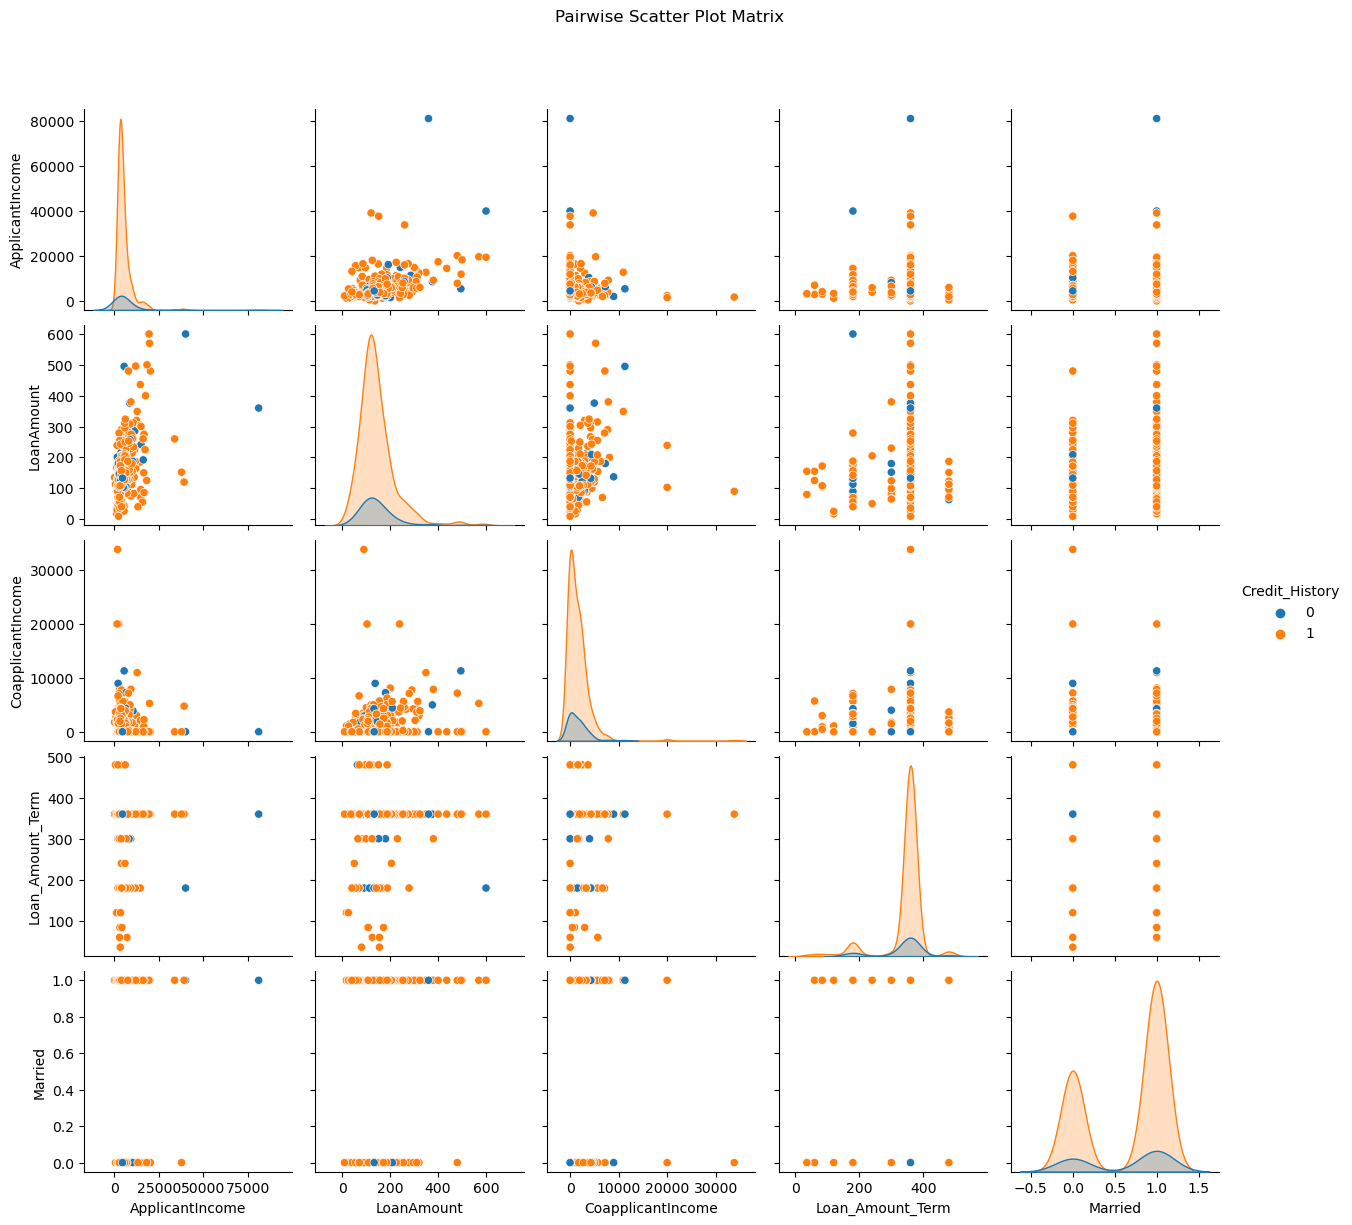

In [7]:
# Use a pairplot to investigate the relationships between the important features in the dataset
# Hue is used on "Credit_History" to see how it relates to the important features in the dataset
important_features = ['Credit_History', 'ApplicantIncome', 'LoanAmount', 'CoapplicantIncome', 'Loan_Amount_Term', 'Married']
sns.pairplot(data_numeric[important_features], hue='Credit_History', diag_kind='kde')
plt.suptitle('Pairwise Scatter Plot Matrix')
plt.subplots_adjust(top=0.9)
plt.show()

### Conclusions
* **Marital Status and Credit History**: If a borrower is married, the data suggests that they may have a higher likelihood of having a credit history. This can be beneficial for loan approval, as a credit history improves the chances of getting approved for a loan. 
* **Marital Status**: The visualizations indicate that marital status doesn't appear to have a substantial impact on the other important variables like ApplicantIncome, LoanAmount, or CoapplicantIncome as whether you are single or married, there seem to be minimal differences in these aspects. Prospective borrowers should primarily focus on factors like credit history, income, and other important features when applying for a loan.
* **Credit History**: Based on the previous findings, it's been established that credit history significantly impacts loan approval status. Nevertheless, the visualizations above indicate that credit history doesn't have a discernible influence on other crucial variables such as ApplicantIncome, LoanAmount, or CoapplicantIncome. Consequently, while credit history is a pivotal factor, it doesn't directly affect the other aspects of the loan application. Therefore, having a credit history is a prerequisite for loan approval, but it alone doesn't guarantee automatic loan approval; other factors come into play.

**Target Variable**: Loan_Status <br>
**Independent Variables**: Credit_History, ApplicantIncome, LoanAmount, CoapplicantIncome and Married